<a href="https://colab.research.google.com/github/thamiko1/ML_projects/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle settings and download dataset**

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:09<00:00, 93.9MB/s]
100% 812M/812M [00:09<00:00, 91.3MB/s]


**Extracting the zipped dataset**

In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [ ]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [ ]:
import os

_,_, files = next(os.walk('./train'))
print(len(files))

25000


Print image names

In [ ]:
file_names = os.listdir('./train')
print(file_names)

['dog.2262.jpg', 'dog.9477.jpg', 'dog.10534.jpg', 'cat.3410.jpg', 'cat.11222.jpg', 'dog.1660.jpg', 'dog.6170.jpg', 'cat.10161.jpg', 'dog.981.jpg', 'cat.3177.jpg', 'dog.9895.jpg', 'cat.479.jpg', 'dog.3093.jpg', 'cat.4340.jpg', 'dog.6223.jpg', 'cat.9477.jpg', 'dog.11306.jpg', 'dog.2004.jpg', 'cat.9577.jpg', 'cat.2171.jpg', 'cat.9189.jpg', 'dog.1432.jpg', 'cat.8251.jpg', 'dog.6375.jpg', 'dog.11967.jpg', 'cat.3561.jpg', 'cat.3506.jpg', 'cat.7599.jpg', 'cat.3557.jpg', 'cat.10708.jpg', 'dog.11659.jpg', 'cat.8510.jpg', 'dog.8354.jpg', 'dog.11169.jpg', 'dog.1627.jpg', 'dog.5760.jpg', 'dog.1146.jpg', 'cat.10334.jpg', 'dog.4728.jpg', 'cat.3492.jpg', 'dog.11748.jpg', 'dog.9460.jpg', 'dog.10458.jpg', 'cat.7043.jpg', 'cat.5135.jpg', 'dog.4564.jpg', 'dog.7611.jpg', 'dog.11897.jpg', 'dog.9236.jpg', 'dog.11463.jpg', 'dog.2755.jpg', 'dog.4326.jpg', 'dog.9214.jpg', 'dog.5848.jpg', 'cat.4989.jpg', 'cat.8187.jpg', 'dog.7405.jpg', 'cat.274.jpg', 'dog.4187.jpg', 'cat.37.jpg', 'dog.3355.jpg', 'dog.10824.jpg'

Importing Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

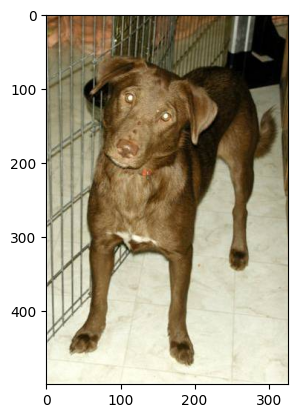

In [ ]:
img = mpimg.imread('./train/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

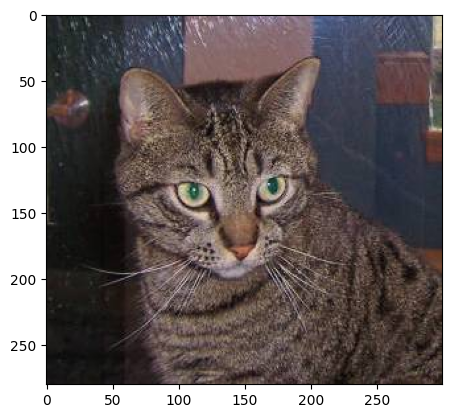

In [ ]:
img = mpimg.imread('./train/cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

**Count number of images of each label**

In [ ]:
file_names = os.listdir('./train')
cat=0
dog=0
for i in file_names:
  if i[:3] == 'cat':
    cat+=1
  else:
    dog+=1
print('total cats:', cat)
print('total dogs:',dog)

total cats: 12500
total dogs: 12500


**Resizing all images**

In [ ]:
!mkdir resized_images

In [ ]:
og_folder = './train/'
new_folder = './resized_images/'
for i in range(2000):
  file_name = os.listdir(og_folder)[i]
  img_path = og_folder+file_name

  img = Image.open(img_path)
  img = img.resize((224,224))

  newImgPath = new_folder+file_name
  img.save(newImgPath)

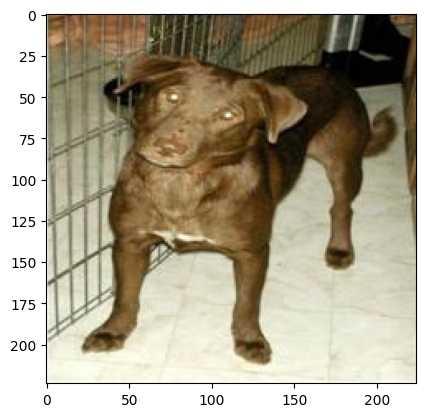

In [ ]:
img = mpimg.imread('./resized_images/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
print(len(os.listdir('./resized_images')))

2000


**Labeling images**

In [ ]:
labels=[]

for i in os.listdir("./resized_images"):
  if i[:3] == 'cat':
    labels.append(1)
  else:
    labels.append(0)

print(labels)

[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 

In [ ]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 994 1006]


**Covert images into np arrays**

In [ ]:
import cv2
import glob
files = []
for i in os.listdir("./resized_images"):
  files.append(new_folder+i)
  print(new_folder+i, end=' ')
images = np.asarray([cv2.imread(file) for file in files])
print(images[0])

./resized_images/dog.2262.jpg ./resized_images/dog.9477.jpg ./resized_images/dog.10534.jpg ./resized_images/cat.3410.jpg ./resized_images/cat.11222.jpg ./resized_images/dog.1660.jpg ./resized_images/dog.6170.jpg ./resized_images/cat.10161.jpg ./resized_images/dog.981.jpg ./resized_images/cat.3177.jpg ./resized_images/dog.9895.jpg ./resized_images/cat.479.jpg ./resized_images/dog.3093.jpg ./resized_images/cat.4340.jpg ./resized_images/dog.6223.jpg ./resized_images/cat.9477.jpg ./resized_images/dog.11306.jpg ./resized_images/dog.2004.jpg ./resized_images/cat.9577.jpg ./resized_images/cat.2171.jpg ./resized_images/cat.9189.jpg ./resized_images/dog.1432.jpg ./resized_images/cat.8251.jpg ./resized_images/dog.6375.jpg ./resized_images/dog.11967.jpg ./resized_images/cat.3561.jpg ./resized_images/cat.3506.jpg ./resized_images/cat.7599.jpg ./resized_images/cat.3557.jpg ./resized_images/cat.10708.jpg ./resized_images/dog.11659.jpg ./resized_images/cat.8510.jpg ./resized_images/dog.8354.jpg ./res

In [ ]:
print(images.shape)

(2000, 224, 224, 3)


In [ ]:
X = images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

**Feature Scaling**

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)

[[[[0.12941176 0.01568627 0.        ]
   [0.14509804 0.03137255 0.00392157]
   [0.17254902 0.05882353 0.03137255]
   ...
   [0.23137255 0.15686275 0.16862745]
   [0.21960784 0.14509804 0.15686275]
   [0.21176471 0.1372549  0.14901961]]

  [[0.1254902  0.01176471 0.        ]
   [0.15686275 0.04313725 0.01568627]
   [0.19607843 0.08235294 0.05490196]
   ...
   [0.23137255 0.15686275 0.16862745]
   [0.21960784 0.14509804 0.15686275]
   [0.21176471 0.1372549  0.14901961]]

  [[0.14117647 0.02745098 0.        ]
   [0.17647059 0.0627451  0.03529412]
   [0.21568627 0.09803922 0.07843137]
   ...
   [0.22352941 0.15686275 0.16862745]
   [0.21960784 0.14509804 0.15686275]
   [0.21176471 0.1372549  0.14901961]]

  ...

  [[0.2        0.05098039 0.04313725]
   [0.2        0.05098039 0.04313725]
   [0.18823529 0.05098039 0.03921569]
   ...
   [0.49019608 0.41176471 0.34509804]
   [0.39607843 0.3254902  0.25882353]
   [0.33333333 0.27058824 0.20392157]]

  [[0.2        0.05098039 0.04313725]
   [0.2

**Building ANN**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 13s 39ms/step - loss: 0.2402 - accuracy: 0.8969
Epoch 2/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0740 - accuracy: 0.9781
Epoch 3/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0541 - accuracy: 0.9856
Epoch 4/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0426 - accuracy: 0.9881
Epoch 5/5
50/50 [==============================] - 2s 49ms/step - loss: 0.0368 - accuracy: 0.9894


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 2s 86ms/step - loss: 0.1074 - accuracy: 0.9675
Test Loss = 0.10736711323261261
Test Accuracy = 0.9674999713897705


Path of the image to be predicted: /content/images (1).jpg


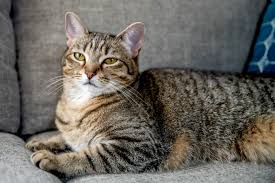

1/1 [==============================] - 1s 916ms/step
[[-3.9328454  4.517925 ]]
1
Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Dog')

else:
  print('Cat')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Dog')

else:
  print('Cat')